<a href="https://colab.research.google.com/github/dasog94/3_min_keras/blob/master/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!git clone https://github.com/dasog94/3_min_keras.git

fatal: destination path '3_min_keras' already exists and is not an empty directory.


In [43]:
cd 3_min_keras/

/content/3_min_keras/3_min_keras


In [19]:
from keras import models, layers

Nin = 784
Nh_1 = [100, 50]
number_of_class = 10
Nout = number_of_class

In [23]:
class DNN(models.Sequential):
  def __init__(self, Nin, Nh_1, Nout):
    super().__init__()
    self.add(layers.Dense(Nh_1[0], activation='relu', input_shape=(Nin,), name='Hidden-1'))
    self.add(layers.Dropout(0.2))
    self.add(layers.Dense(Nh_1[1], activation='relu', name='Hidden-2'))
    # self.add(layers.Dropout(0.2))
    self.add(layers.Dense(Nout, activation='softmax'))

    self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
class DNN_models_class(models.Model):
  def __init__(self, Nin, Nh_1, Nout):
    hidden_1 = layers.Dense(Nh_1[0])
    hidden_2 = layers.Dense(Nh_1[1])
    output = layers.Dense(Nout)
    relu = layers.Activation('relu')
    softmax = layers.Activation('softmax')
    dropout = layers.Dropout(0.2)

    x = layers.Input(shape=(Nin,))
    h_1 = dropout(relu(hidden_1(x)))
    h_2 = relu(hidden_2(h_1))
    y = softmax(output(h_2))

    super().__init__(x, y)
    self.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [10]:
import numpy as np
from keras import datasets #mnist
from keras.utils import np_utils # to_categorical

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

L, W, H = X_train.shape

print(X_train.shape)


(60000, 28, 28)


In [12]:
X_train = X_train.reshape(-1,W*H)
X_test = X_test.reshape(-1, W*H)

print(X_train.shape)
print(X_test.shape)


(60000, 784)
(10000, 784)


In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [26]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc = 0)

def plot_acc(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc = 0)

In [50]:
model = DNN(Nin, Nh_1, Nout)
model.summary()

Model: "dnn_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
Hidden-2 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [51]:
model = DNN_models_class(Nin, Nh_1, Nout)
model.summary()

Model: "dnn_models_class_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 100)          78500       input_2[0][0]                    
__________________________________________________________________________________________________
activation_3 (Activation)       multiple             0           dense_9[0][0]                    
                                                                 dense_10[0][0]                   
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 100)          0           activation_3[0][

In [28]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 100, validation_split=0.2)
performance_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Test Loss and Accuracy ->', performance_test)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 56us/step - loss: 1.4167 - accuracy: 0.5554 - val_loss: 0.7663 - val_accuracy: 0.7688
Epoch 2/10
48000/48000 [==============================] - 2s 50us/step - loss: 0.7075 - accuracy: 0.7763 - val_loss: 0.5249 - val_accuracy: 0.8533
Epoch 3/10
48000/48000 [==============================] - 2s 49us/step - loss: 0.5321 - accuracy: 0.8417 - val_loss: 0.4136 - val_accuracy: 0.8823
Epoch 4/10
48000/48000 [==============================] - 2s 49us/step - loss: 0.4446 - accuracy: 0.8689 - val_loss: 0.3515 - val_accuracy: 0.9007
Epoch 5/10
48000/48000 [==============================] - 2s 50us/step - loss: 0.3901 - accuracy: 0.8851 - val_loss: 0.3139 - val_accuracy: 0.9093
Epoch 6/10
48000/48000 [==============================] - 2s 50us/step - loss: 0.3550 - accuracy: 0.8955 - val_loss: 0.2966 - val_accuracy: 0.9137
Epoch 7/10
48000/48000 [==============================] - 2s 50us/st

In [52]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 100, validation_split=0.2)
performance_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Test Loss and Accuracy ->', performance_test)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 53us/step - loss: 1.5481 - accuracy: 0.5272 - val_loss: 0.8190 - val_accuracy: 0.7699
Epoch 2/10
48000/48000 [==============================] - 2s 51us/step - loss: 0.7110 - accuracy: 0.7859 - val_loss: 0.4988 - val_accuracy: 0.8633
Epoch 3/10
48000/48000 [==============================] - 2s 51us/step - loss: 0.5076 - accuracy: 0.8508 - val_loss: 0.3903 - val_accuracy: 0.8903
Epoch 4/10
48000/48000 [==============================] - 2s 52us/step - loss: 0.4279 - accuracy: 0.8752 - val_loss: 0.3375 - val_accuracy: 0.9032
Epoch 5/10
48000/48000 [==============================] - 2s 51us/step - loss: 0.3815 - accuracy: 0.8880 - val_loss: 0.3043 - val_accuracy: 0.9115
Epoch 6/10
48000/48000 [==============================] - 2s 51us/step - loss: 0.3527 - accuracy: 0.8979 - val_loss: 0.2808 - val_accuracy: 0.9179
Epoch 7/10
48000/48000 [==============================] - 2s 51us/st

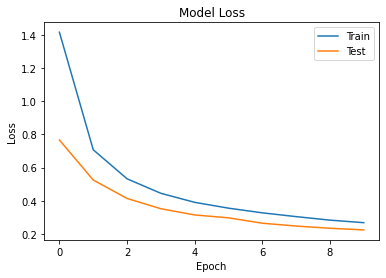

In [46]:
import matplotlib.pyplot as plt
from kerasapp.skeras import plot_loss

plot_loss(history)
plt.show()